In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# tell matplotlib don't bother to use 'tex' (as it can't find path to 'tex')
# this way, matplotlib can render latex using its own way of handling this, called 'mathtex'
plt.rcParams['text.usetex'] = False 

import math
import scipy.stats as stats

import seaborn as sns
sns.set_theme()

# An Informal Example of Hypothesis Testing

Pete claims he can guess the suit of a randomly selected cards <u>more than $\frac{1}{4}$ of the time</u> on average. 


## Test with Pete has guesses 28 times correctly

We make Pete guess the suit of a randomly selected card 100 times. He guesses correctly 28 times. 

Does this provide strong evidence that Pete has a probability of greater than $\frac{1}{4}$ of correctly guessing the suit of a card?


**Let's try the informal hypothesis test as follows:**

Say, we assme Pete can guess correctly for $\frac{1}{4}$ of the time on average, we have **null hypothesis**:

$$H_0: p=\frac{1}{4}$$

against the **alternative hypothesis**:

$$H_1: p > \frac{1}{4}$$


Text(0, 0.5, 'Probability')

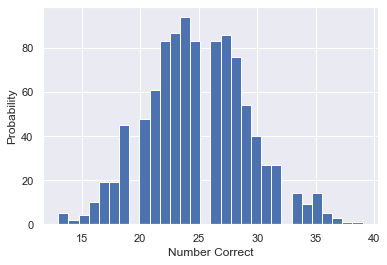

In [3]:
# If Pete is guessing randomly, the number of correct guesses
# would follow a binomial distribution with parameters $n=100$ and $p=1/4$
n, p = 100, 1/4
s = np.random.binomial(n,p,1000)
plt.hist(s, bins=30, edgecolor='white')
plt.xlabel('Number Correct')
plt.ylabel('Probability')

In [4]:
# Compute the probability of performing better than the test
# which is, having more than 28 correct guesses 
k = 28 
p_1 = 1-stats.binom.cdf(k,n,p) # probability of having more successes than k
p_2 = stats.binom.pmf(k,n,p) # probability of getting k successes
print('P(X >= 28):', round(p_1+p_2,3))

P(X >= 28): 0.278


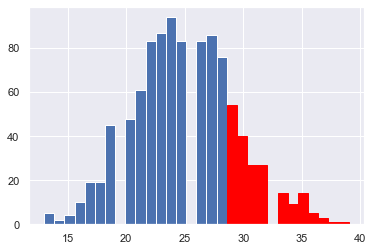

In [5]:
# Plot the probability of getting more than 28 correct guesses 
values, bins, patches = plt.hist(s, bins=30, edgecolor='white')
for bar in patches:
    if bar.get_x() >= 28:
        bar.set_color('red')

As the probability is not very small, it's likely to get this many correct guesses due to chance, therefore, there is no strong evidence that Pete has better than $\frac{1}{4}$ chance of correctly guessing the suit.

In other words, we found that we did not have strong evidence against the null hypothesis.

## How if Pete has guesses 44 times correctly?



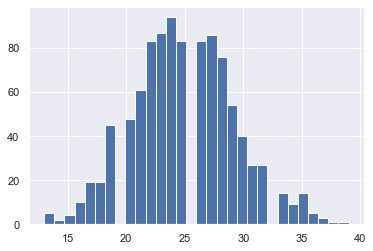

In [6]:
# Plot the probability of getting more than 28 correct guesses 
values, bins, patches = plt.hist(s, bins=30, edgecolor='white')
for bar in patches:
    if bar.get_x() >= 44:
        bar.set_color('red')

In [7]:
# Compute the probability of performing better than the test
# which is, having more than 28 correct guesses 
k = 44 
p_1 = 1-stats.binom.cdf(k,n,p) # probability of having more successes than k
p_2 = stats.binom.pmf(k,n,p) # probability of getting k successes
print(f'P(X >= {k}):', round(p_1+p_2,3))

P(X >= 44): 0.0


As the probability is very close to $0$, i.e. it's very unlikely to make this many correct guesses due to chance. This could imply:

- Either Pete just happen to make a very lucky successful test with us by chance; 

- Or he can really make more than $\frac{1}{4}$ of guesses correct.

# Hypothesis Test for Means


## Z or T Tests

<img src='../img/z-or-t.png' width=500>

If the sample size is large enough, then $Z$ and $T$ test will conclude the same results, because:
- for a large sample size, **sample variance** will be a good estimate of **population variance**, so that we can use $Z$ test with **sample variance**;
- similarly, for a large sample, we have a high **degree of freedom**, since t-distribution approaches normal distribution, the difference between Z score and T score is negligible.


## Different Senarios

When we conduct hypothesis test for means, we can come across the following common senarios:

- Single Population

    - known varaince (**z test**)
    - unknown variance (**t test**)
    
    
- Two Populations
    - The paired populations
        - known population variance (**z test for difference of means**)
        - unknown population variance (**t test for difference of means**)
    - The two populations are independent
        - known population variance (**z test for paired difference of means**)
        - unknown population variance, but assumed equal (**t test using pooled-variance from the two populations**)
        - unknown population variance, assumed unequal



## Assumptions for Z or T Tests

**Data Collection**:
- Samples must be <u>random</u> to remove or minimize bias.
- Samples must be <u>representative of the populations</u> in question.


**Populations and Sample Size**

||One Population|Two Populations|
|:---|:---|:---|
|Population Distribution or|Normally Distributed|Normally Distributed (both)|
|Sample Size|$n>30$|$n>30$|
|If normality of population distribution cannot be verified and $n \leq 30$|The sample shall not be strongly skewed and does not have outliers<br>(plot sample data using <u>histogram</u> or <u>dotplot</u> to explore)|The sample difference shall not be strongly skewed and does not have outliers<br>(plot sample data using <u>histogram</u> or <u>dotplot</u> to explore)|





# Test Statistics


## Testing for One Population Mean


|# of Population|Population Variance|Samples|Critical Value|Variance|Test statistics|
|:---|:---|:---|:---|:---|:---|
|One|Known|-|$$z$$|$$\sigma^2$$|$$Z=\frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$|
|One|Unknown|- |$$t$$|$$s^2$$|$$T=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}$$|




## Comparing Two Populations Means


||Two Populations <br>(Paired)|Two Populations <br>(Independent)|Two Populations <br>(Independent, pooled-variance)|Two Populations<br>(Independent, unpooled-variance)|
|:---|:---|:---|:---|:---|
|Datasets|Population variance unkown, or sample size $n<30$|Population variance known, or sample size $n>30$|Population variance unknown, assumed equal|Population variance unknown, assumed different|
|Use Case|**Before and after** datasets of the same subject, e.g. patients' blood test results before and after taking pills;<br><br>Two datasets having **cause and effect** relationship, e.g. SAT test results and college admission rate of the same subjects, or husbands and wives' activities time at home|Two independent datasets for different subjects and there is no cause and effect relationship in between, sometimes, using different sample sizes. But population variance is known. |Two independent datasets that with small sample size, they don't have impact on each other but they might share similar variance, which, although, is unkown. For example, apple prices in different cities. |Well, this seems like the case of comparing apple to orange. However, in statistics, it is possible to do so, though it's not easy.|
|Mean of Difference|$$\bar{d} = \bar{x} - \bar{y}$$|$$\bar{d} = \bar{x} - \bar{y}$$|$$\bar{d} = \bar{x} - \bar{y}$$|$$\bar{d} = \bar{x} - \bar{y}$$|
|Variance of Difference|$$s_{d}^2\text{ where }d=x-y$$|$$\sigma_{\text{d}}^2 = \frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}$$|We estimate the sample variance by **pooling** both sample information (**pooled variance**) <br><br> $$s_p^2 = \frac{(n_x-1)s_x^2 + (n_y-1)s_y^2}{n_x+n_y-2}$$|$$s_x^2, s_y^2$$|
|SE|$$SE = \sqrt{\frac{s_d^2}{n}}=\frac{s_d}{\sqrt{n}}$$|$$SE= \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}$$|As the **pooled variance** has two datasets' sample info combined, we cannot compute the standard error simply by getting the square root of the **pooled variance**, we need to do it as follows instead:<br><br> $$SE = \sqrt{\frac{s_p^2}{n_x}+\frac{s_p^2}{n_y}}$$|$$SE = \sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}$$|
|Critical Value|$$t_{n-1, \alpha/2}$$|$$z_{\alpha/2}$$|To look at the t-value of two datasets, the **degree of freedom** shall be the combined sample size: <br>$$v=n_x+n_y-2$$ <br>The critical t-value is: <br> $$t_{n_x+n_y-2, \alpha/2}$$|In this senario, we need to compute the **degree of freedom** as follows: <br> $$v = \frac{(\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y})^2}{\frac{(\frac{s_x^2}{n_x})^2}{(n_x-1)} + \frac{(\frac{s_y^2}{n_y})^2}{(n_y-1)}}$$<br>and the critical t-value is: <br> $$t_{v, \alpha/2}$$|
|CI|$$\bar{d}\pm t_{n-1, \alpha/2}\frac{s_d}{\sqrt{n}}$$|$$\bar{d}\pm z_{\alpha/2}\sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}$$|$$\bar{d}\pm t_{n_x+n_y-2, \alpha/2} \sqrt{\frac{s_p^2}{n_x}+\frac{s_p^2}{n_y}}$$|$$\bar{d}\pm t_{v, \alpha/2} \sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}$$|
|Test Statistic|$$T=\frac{\bar{d}-\mu_0}{s_d/\sqrt{n}}$$|$$Z=\frac{\bar{d}-\mu_0}{\sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}}$$|$$T=\frac{\bar{d}-\mu_0}{\sqrt{\frac{s_p^2}{n_x}+\frac{s_p^2}{n_y}}}$$|$$T$$|


## Critical Values for Different Tests

||z|t|
|:---|:---|:---|
|lower-tailed|$$z_{\alpha}$$|$$t_{n-1, \alpha}$$|
|upper-tailed|$$z_{1-\alpha}$$|$$t_{n-1, 1-\alpha}$$|
|two-tailed|$$z_{\alpha/2}$$|$$t_{n-1, \alpha/2}$$|

# P-value


## P-value for Continuous Data


> Same as **p-value** for discrete random variable, the **p-value** for continuous random variable is the probability of observing another test result at least or more extreme than the test result actually observed in an experiment, given the null hypothesis is true. 

However, the **continuous random variable** is not countable and we cannot measure the probability of a possible value by its frequency, instead, it's measured as **cumulative probability** for an interval, such as $P(X\leq x)$, which actually equals $P(X<x)$, because $P(X=x)=0$.


##### Example


The aquarium workers need to minitor how much their sea otters eat. 

The amount of food a particular otter eats daily is approximately normally distributed with $\mu = 17\text{ lbs}$ and $\sigma = 1\text{ lb}$. This otter seems not eating enough recently, so the workers took a random sample $n=10\text{ days}$ and observed a sample mean of $\bar{x}=16.5\text{ lbs}$ of food per day.

The employees want to test $H_0: \mu = 17$ and $H_a: \mu < 17$. 

**Based on the simulated results, what is the approximate p-value of the test, which sample mean is $\bar{x}=16.5$?**

number of sample results <= 16.5: 606
number of samples:  10000
p-value:  0.0606


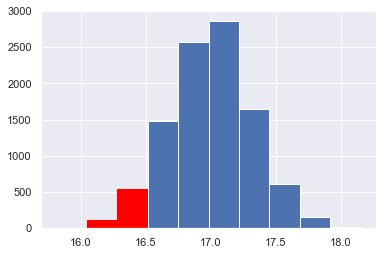

In [15]:
# Simulation the sampling distribution
mu = 17
sigma = 1
n = 10 # sample size
k = 10000 # number of experiments (the more the closer for simulation of population)

samples = np.random.normal(loc=mu, scale=sigma, size=(k,n))
sample_means = samples.mean(axis=1)

# Calculate p-value of the test with the simulation results
sample_mean = 16.5
extreme_results = sample_means[sample_means <= sample_mean]
print(f'number of sample results <= {sample_mean}:', len(extreme_results))
print('number of samples: ', len(sample_means))
print('p-value: ', len(extreme_results)/len(sample_means))

# visualize the histogram
_, _, bars = plt.hist(sample_means, edgecolor='white')
for bar in bars:
    if bar.get_x() <= 16.5:
        bar.set_color('red')
plt.show()

## Compute P-value using Test Statistics


**P-value Formula**

||Formula|Probability Calculation|
|:---|:---|:--|
|left-tailed test|$$p = P(T \leq t|H_0)$$|$$\boxed{P(T \leq t) = CDF(T=t)}$$
|right-tailed test|$$p = P(T \geq t | H_0)$$|$$\boxed{P(T \geq t) = 1 - CDF(T=t)}$$|
|two-tailed|$$p = 2\cdot P(T \geq |t| | H_0))$$|$$\boxed{P(T \geq |t|) = 2\cdot (1 - CDF(T=|t|))}$$|


For example, we are testing for $H_0: \mu = \mu_0$ against $H_a: \mu \neq \mu_0$ at significance level of $1\%$ ($\alpha = 0.01$). And the Z statistics obtained from the sample data is $Z = -1.53$:

- This is a 2-tailed test, we are to find the $p = 2\cdot P(T \geq |-1.53|)$ given $H_0$ is true,

- which is computed as follows:

$$\begin{split}
p &= P(Z\leq -1.53) + P(Z\geq 1.53) \\
&= 2\cdot P(Z\geq |1.53|)\\
&\approx 0.126
\end{split}$$

In [893]:
# compute 2-sided p-value using stats.norm.cdf()
round((1-stats.norm.cdf(1.53))*2,3)

0.126

## Understand P-value in Application


**Here's an example**: 

Do women who smoke run the risk of shorter pregnancy and premature birth? The mean pregnancy length is 266 days. We test the following hypotheses.

- $H0: μ = 266$
- $Ha: μ < 266$

Suppose a random sample of 40 women who smoke during their pregnancy have a mean pregnancy length of 260 days with a standard deviation of 21 days. The P-value is 0.04.

What probability does the P-value of 0.04 describe? Choose from the following:
- [ ] There is a 4% chance that smokers will have a mean pregnancy length of 266 days
- [x] If smoking does not affect pregnancy length, there is a 4% chance that a random sample of 40 smokers will have pregnancies that last less than 260 days. ($\checkmark$)
- [ ] There is a 4% probability that smoking shortens pregnancy length. These means that there is a 4% chance that random samples of 40 smokers have mean pregnancy lengths less than 266. 


**Note**

- A small P-value here does indicate that smokers have a shorter pregnancy length. But it is **not** a measure of <u>the probability of whether this is true</u>, or <u>the probability that the alternative hypothesis is true</u>.” The P-value is not a probability statement about either hypothesis.


- What P-value really mean is, if $H_0: \mu = 266$ is true, there is only a 4% chance that we will see pregnancies shorter than we see in the data (less than 260 days).

- As $0.126 > 0.01$, we cannot reject $H_0$ at signficance level of $1\%$

# Decision Rules

There are commonly two approaches to decide the result of test:

- **Rejection region** approach, which compares the test statistics and critical value on the rejection line.
- The **p-value** approach, which compare the **p-value** and the level of significance $\alpha$.

Usually, you will be using **p-value** to make a decision.  


|Accept $H_0$|Reject $H_0$|
|:---|:---|
|$$|\text{test statistics}|\leq|\text{critical value}|$$|$$|\text{test statistics}|>|\text{critical value}|$$|
|p-value $< \alpha$, most often $0.05$ |p-value $\geq \alpha$, most often $0.05$|


## Decision with "Rejection Region"
    
If the null hypothesis, the **Z-score** will have the standard normal distribution $N\sim(0,1)$. And we expect the **Z-score** to be within critical values for acceptance of $H_0$, depending on the significance level of our test:

- If $|Z| < |z|$, we accept the null hypothesis;
- vice versa. 

For example, we are testing $H_0: \mu = \mu_0$ at significance of $5\%$ (i.e. $95\%$ confidence)
- this will be a **two-tailed** test
- if $-1.96 \leq Z \leq 1.96$ , we  can accept $H_0$;
- if $Z < -1.96$ or $Z > 1.96$, we reject $H_0$.

<img src = '../img/standard-normal-dist-z.png'>

## Decision with "P-value"

The preferred way of deciding the test result is compare **P-value** to significance level $\alpha$. 

<img src='../img/p-value-tests.png' width=500>

- Given the null hypothesis is true, if the probability of observing the data being at least as extreme as the sample result is very low, that is, the probability of observing the data not as extreme as the sample result is very high, therefore, if $p>\alpha$, we accept the null hypothesis, if $p\leq \alpha$, we reject the null hypothesis.
- The <u>smaller</u> the **p-value**, the <u>greater</u> the evidence against $H_0$
- **p-value** applies to not only normal distribution, but also all other distributions, e.g. uniform, binomial, student's t distributions.


## Decision on Directional Test using Test Statistics

Besides computing p-value for the direction of interest, e.g. **left-tailed** ro **right-tailed** to confirm result, we can actually examine the test statistics to make a quick decision:

||One Mean|Two Means|
|:---:|:---:|:---:|
|Test Statistics<br>(Z or T)|$\frac{\bar{x} - \mu_0}{se}$|$\frac{(\bar{x} - \bar{y})-\mu_0}{se}$ where $\mu_0 = 0$ if $\bar{x} = \bar{y}$|
|Rule|$$\text{If Z or T} > 0:$$ $$\bar{x} > \mu_0$$<br>vice versa.|$$\text{If Z or T} > 0:$$ $$\bar{x} > \bar{y}$$<br>vice versa.|
|Example|We are comparing if data scientists earns more than 113000 on average, the test score of the sample mean is $T = \frac{\bar{x}-113000}{se} = -2.00$, as T is negative, we infer that data scientists earn less than the hypothized mean. |we are comparing the average salary paid to female ($\mu_f$) and male ($\mu_m$) in a city, the T-score of their difference is $T = \frac{(\mu_f - \mu_m)-0}{se} = 2.00$, as T is positive, we infer that the difference in pay is positive, i.e. females earn more. 

# Test for One Mean, Known Population Variance


## Steps to Follow (Detailed)

### Formulate Null Hypothesis

> The test is to find out **is there strong evidence that the <U>population mean is different from some value that is of interest to us**? Is it different from some **hypothesized** value? 
  
We will have **null hypothesis** as follows:

$$H_0: \mu = \mu_0$$

where, 

- $\mu$ is the population mean
- $\mu_0$ is the hypothesized value, the mean from null hypothesis.

### Formulate Alternative Hypothesis

> **The appropriate choice of alternative hypothesis** depends on the problem concerned, and **should not be based on the current sample's data** (You should not use the same data that suggests a hypothesis to test that hypothesis, that's **cheating**)

Against $H_0$,  we choose one of the possible **alternative hypotheses**:
    
- $H_a: \mu < \mu_0$ (lower-tailed test)
- $H_a: \mu > \mu_0$ (upper-tailed test)
- $H_a: \mu \neq \mu_0$ (two-tailed test)
    
    
### Compute Test Statistics
    
To test $H_0: \mu = \mu_0$, we compute **Z statistics** or **Z-score** using the sample data.
> **Z-score** measures the distance from **sample mean** to **hypothesized mean** in **standard deviation**:

$$\boxed{Z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}}$$

where:

- $\bar{x}$ is the **sample mean**
- $\sigma$ is the **known population standard deviation**
- $\sigma_{\bar{x}} = \sigma/\sqrt{n}$, the **sample standard deviation**, which is the standard deviation of the sampling distribution of the sample means


### Test Result using Rejection Region

Depending on the level of significance for the test, we will look up the critical t-value ($z$) for "rejection region":

- $z_{\alpha, n-1}$ for one-tailed test;
- $z_{\alpha/2, n-1}$ for two-tailed test

If $|Z| \leq |z|$, we accept the null hypothesis; vice versa.



### Test Result using p-value

Or we can decide the test result using the preferred way: **p-value**, 

- If $p \leq \alpha$, we have evidence to reject $H_0$;
- If $p > \alpha$, we accept $H_0$

## Examples


### Example: Average Data Scientist Salaries
    
Glassdoor shows the average data scientists salary is $\$113,000$, which you have doubt about. Instead, you suspect whether data scientists can make more than this amount on average. 
    
1. We will test the **null hypothesis**:
      
    $$H_0: \mu \geq 113000$$
    
    against the alternative:
    
    $$H_a: \mu < 113000$$
    
2. Then, you have randomly sampled 30 data scientists' salaries for the hypothesis test.
    
   Does the sample data yield strong evidence that $\mu = 113000$? 
   
   (suppose we know the population $\sigma = 15000$ and we will test at significance of $0.1\%$)
   
**Note**

When we compute P-value, we are to find the probability of having data < the sample result given the null hypothesis is true. Therefore, this will be a **lower-tailed** test.

In [894]:
# Import data
fname = 'data/Test-for-the-mean.Population-variance-known.xlsx'
salaries = pd.read_excel(fname, skiprows=6, nrows=30, usecols=[1])
print('size of sample (n): ', len(salaries))
salaries.head()

size of sample (n):  30


,Dataset
0,117313
1,104002
2,113038
3,101936
4,84560


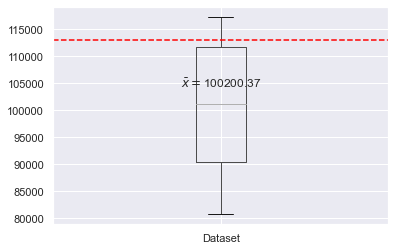

In [895]:
# Let's explore sample data using boxplot
mean = round(salaries.mean()[0],2)
salaries.boxplot()
plt.axhline(y=113000, color='red', linestyle='--')
plt.text(1,105000, r'$\bar{x}=$'+f'{mean}', ha='center', va='center')
plt.show()

In the plot, both the mean and the entire IQR of the sample data are below the hypothesized value $\mu_0$.

Also, since we don't know if the population data is normally distributed and $n\leq30$, for the inference result to be accurate, we shall verify if the sample data is normally distributed:

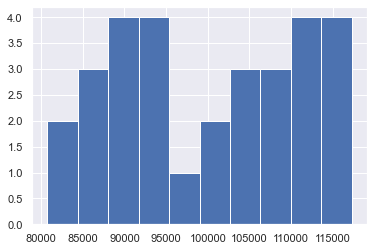

In [896]:
# Plot sample data using histogram
plt.hist(salaries['Dataset'])
plt.show()

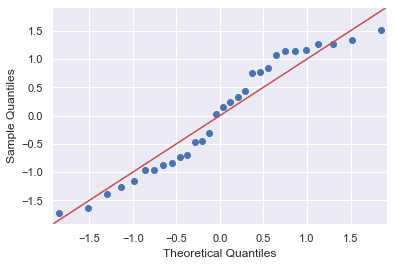

In [897]:
# Explore sample data using Normal Quantile-quantile plot
import statsmodels.api as sm
sm.qqplot(salaries['Dataset'], fit=True, line='45')
plt.show()

The sample data doesn't follow normal distribution closely as observed in both histogram and normal Q-Q plots. However, some researchers argue that if the sample size is large enough ($n>30$), we can still use test statistics for inference study assuming the data follows normal distribution. 

Now, let's compute the Z-statistics of the sample data:

In [898]:
# Compute Z-score of the sample data
mu_0 = 113000
sigma = 15000
n = len(salaries)

# compute the Z-score from mu
Z = round((mean-mu_0)/(sigma/math.sqrt(n)),3)
Z

-4.674

In [899]:
# Compute the critical value for the sigficance level of interest
alpha = 0.01
z = round(stats.norm.ppf(alpha/2),3)
z

-2.576

**Conclusion using Rejection Region Approach**

As the Z-score is smaller than the lower critical value for accepting $H_0$, we reject the null hypothesis. Instead, we accept that $H_a: \mu < 113000$. 

In [900]:
# Compute p-value, the probability of observing z values < Z if H_0 is true
# p = cdf(Z) for lower tailed test
p = round(stats.norm.cdf(Z),3)
p

0.0

**Conclusion using p-value**

Since $p = 0.0$ and $\alpha = 0.001$, we have $p < \alpha$. Therefore, we have the evidence against $H_0$ at $0.1\%$ level of significance (with $99.9%$ of confidence). 

For further explanation, if $H_0$ is true, the probability of having a sample mean so far away from $113,000$ on the lower tail side is very low. Therefore, with the sample data, we have strong evidence to reject $H_0$ and accept $H_a$, that is, we accept the alternative hypothesis that the data scientists, on average, earn less than what Glassdoor suggests.

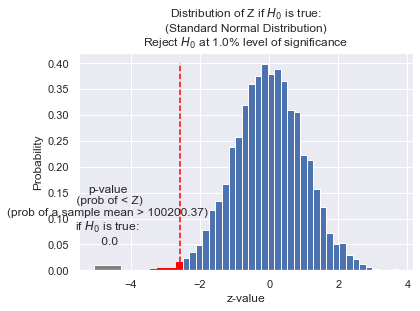

In [901]:
# Plot distribution of Z given H_0 is true (standard normal distribution)
values, bins, bars = plt.hist(np.random.standard_normal(10000), bins=40, 
                                 edgecolor='white', density=True)

# Visualize the rejection zone of null hypothesis
plt.vlines(x=z, ymin=0, ymax=.4, color='red', linestyle='--')

# Probability of Type I Error (rejecting null hypothesis when it's true)
for bar in bars:
    if bar.get_x() < z:
        bar.set_color('red')

# P-value: probability of observing the sample Z-score
plt.bar(x=Z,height=prob_Z+.01, color = 'gray')
plt.text(s=f'p-value\n (prob of < Z)\n(prob of a sample mean > {mean:.2f})\nif $H_0$ is true:\n {p}', x=Z,y=.05,ha='center')

# Set titles and x,y labels
plt.title('Distribution of Z if $H_0$ is true:\n'+
          '(Standard Normal Distribution)\n' +
          f'Reject $H_0$ at {alpha*100:.1f}% level of significance')
plt.xlabel('z-value')
plt.ylabel('Probability')
plt.show()

### Example: Average Saturated Fat Content

A company claims that their product contains no 2 grams of saturated fat on average. 

You intend to test whether there is strong evidence the mean saturated fat content is greater than their claim. 

$$H_0: \mu = 2$$ against $$H_a: \mu \neq 2$$

In [902]:
mean = 776
mu_0 = 780
sigma = 16
n = 25

Z = (mean - mu_0)/(sigma/math.sqrt(n))
Z

-1.25

In [903]:
# compute p-value for two-tailed test
p = round(stats.norm.cdf(Z)*2,3)
p

0.211

As $p > 0.05$, we can conclude that we don't have strong evidence to reject null hypothesis with the sample data. Therefore, we can accept the claim made by the company.

# Test for One Mean, Unknown Population Variance

As population variance unknown, we will use **T** test given one of the following assumptions is true:

- The population follows normal distribution or, 
- Sample size is $n>30$,
- Or if both above not met, the sample data follows normal distribution without strong skewness and outliers.


## Steps to Follow (Quick Summary)

1. Null Hypothesis: $H_0: \mu = \mu_0$


2. Alternative Hypothesis (based on the problem at hand): 

    - $H_a: \mu \neq \mu_0$ (two-tailed test)
    - $H_a: \mu < \mu_0$ (lower-tailed test)
    - $H_a: \mu > \mu_0$ (upper-tailed test)


3. Compute test statistics using the sample data:

    $$T=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}$$

    where:
    - $\bar{x}$ is the **sample mean**
    - $\mu_0$ is the **hypothesized mean** from the null hypothesis
    - $s$ is the **standard deviation** of the sample data
    - $s/\sqrt{n}$ is the **sample standard deviation** of the sampling distribution, which is estimated using the **standard deviation** the sample data.


4. Find the critical value for a level of signficance depending on the test: 
    - $t_{n-1, \alpha/2}$ or 
    - $t_{n-1, \alpha}$
    
    
5. Compare $T$ statistics to the critical t-value ($t$) for "rejection region":

   - If $|T| \leq |t|$, we accept the null hypothesis; vice versa.


6. Or we can decide the test result using the preferred way: **p-value**, compute the p-value, then compare it to $\alpha$:
    - If $p \leq \alpha$, we have evidence to reject $H_0$;
    - If $p > \alpha$, we accept $H_0$

## Example

You are working in the marketing department. You know that your email open rate is $40\$% on average, you suspect if you are doing better than your competitor in email marketing. 

One day you happened to have a glimpse of the open rates of some emails from your competitor. 
Can you estimate if your competitor has higher open rate than you from the data? 


**Solution**

We can use null hypothesis to assume your competitor is not doing better you:

$$H_0: \mu \leq 0.4$$

against

$$H_a: \mu > 0.4$$

Note that when we compute p-value, we are to find the probability of having data > observed result from sample, given the null hypothesis is True. Therefore, this is a **right-tailed** test.

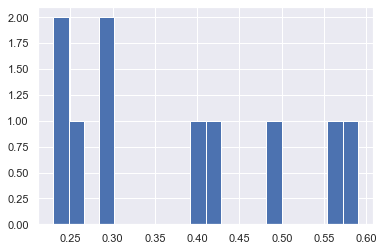

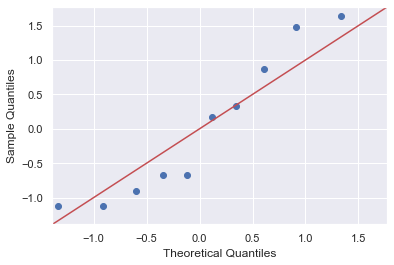

In [904]:
# sample data
open_rates = np.array([.26, .23, .42, .49, .23, .59, .29, .29, .57, .4])

# Plot sample data using histogram
plt.hist(open_rates, bins=20)

# Plot sample data using Normal Quantile-Quantile plot
sm.qqplot(open_rates, fit=True, line='45')
plt.show()

The sample data is close to normal distribution lightly skewed though. We can assume t-test is adequate to draw meaningful conclusion for the hypothesis test.

In [905]:
# hypothesized value
mu_0 = .4

# compute T statistics
n = len(open_rates)
sample_mean = open_rates.mean()
s = open_rates.std(ddof=1)
se = s/math.sqrt(n)
T = (sample_mean-mu_0)/se

print('sample mean:', round(sample_mean,2))
print('standard deviation:', round(s,2))
print('T-score:', round(T,3))

sample mean: 0.38
standard deviation: 0.14
T-score: -0.53


In [906]:
# find t critical value of signficance
v = n-1
alpha = 0.05
t = round(stats.t.ppf(alpha, v),3)
t

-1.833

In [907]:
# if |T|<=|t|, we will accept $H_0$
if abs(T) <= abs(t):
    print('Since |T| < |t|, We accept the null hypothesis.')
else:
    print('We reject the null hypothesis')

Since |T| < |t|, We accept the null hypothesis.


In [908]:
# Compute p-value for right tailed test
# note that stats.t.cdf() requires arguments:
# - x (T statistics) and 
# - df (degree of freedom)
p = 1-round(stats.t.cdf(x=T, df=v),3)

if p < alpha: 
    print(f'p-value = {p:.3f}, it is smaller than alpha ({alpha}), we have evidence to reject null hypothesis')
else:
    print(f'p-value = {p:.3f}, it is larger than alpha ({alpha}), we cannot reject the null hypothesis')

p-value = 0.695, it is larger than alpha (0.05), we cannot reject the null hypothesis


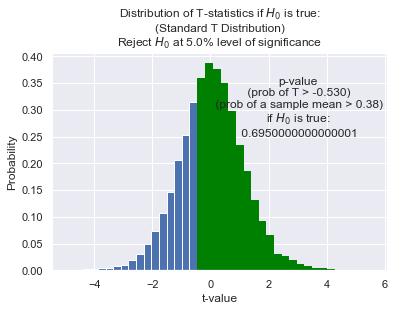

In [909]:
# Visualize the distribution of T statistics given $H_0$ is true (standard t distribution T(0,1))
values, bins, bars = plt.hist(np.random.standard_t(df=v, size=10000), bins=40, 
                                 edgecolor='white', density=True)

# P-value (probability of observing value > T)
for bar in bars:
    if bar.get_x() > T:
        bar.set_color('green')

plt.text(s=f'p-value\n (prob of T > {T:.3f})\n (prob of a sample mean > {sample_mean:.2f})\nif $H_0$ is true:\n {p}', x=3,y=.25,ha='center')

# Set titles and x,y labels
plt.title('Distribution of T-statistics if $H_0$ is true:\n'+
          '(Standard T Distribution)\n' +
          f'Reject $H_0$ at {alpha*100:.1f}% level of significance')
plt.xlabel('t-value')
plt.ylabel('Probability')
plt.show()

# Test for Two Means, Dependent,  Unknown Variance (Paired-Difference)

For example, weight loss, blood test, before and after datasets collected from the same subjects.


## Steps to Follow

### Hypothesis

Say, we are comparing the effectiveness of a new drug on blood pressure. So we will compare the difference of the before ($\mu_b$) and after ($\mu_a$) data. 

1. We can formulate the hypothesis as follows:

    $$H_0: \mu_b \geq \mu_a $$

    $$H_a: \mu_b < \mu_a $$


2. For computation, we will convert the above hypothesis to examine **the difference of means** directly:

    $$H_0: D_0 \geq 0$$ 

    $$H_a: D_0 < 0$$ 

    where

    $$D_0 = \mu_b - \mu_a$$




### Compute Test Statistics

As the test is on the difference of means, we will compute the test statistics of $D_0$. 

Suppose we can assume the population follow normal distribution, we will use **T score** here if 

- the variance of the difference of the two populations is unknown
- the sample size is small ($n<30$)

    $$T = \frac{\bar{d}-\mu_0}{s_d/\sqrt{n}}$$
    
  where:
  - $\bar{d}$ is the sample mean of the difference
  - $s_d$ is the sample variance of the difference
  - $\mu_0$ is the hypothesized mean of difference, which shall equal $0$, assuming no difference between two populations
  - $n$ is the sample size of the datasets
  


### Test Result using Rejection Region

Depending on the level of significance for the test, we will look up the critical t-value ($t$) for "rejection region":

- $t_{\alpha, n-1}$ for one-tailed test;
- $t_{\alpha/2, n-1}$ for two-tailed test

If $|T| \leq |t|$, we accept the null hypothesis; vice versa.



### Test Result using p-value

Or we can decide the test result using the preferred way: **p-value**, 

- If $p \leq \alpha$, we have evidence to reject $H_0$;
- If $p > \alpha$, we accept $H_0$

## Example

In this example, we have two datasets of magnesium levels collected from a group of patitents before and after they taking a new drug. We will use these two datasets for hypothesis testing on whether the new drug can help increases the magnesium level. 

Let's assume the null hypothesis is <u>"the new drug won't increase the magnesium level"</u>:

Let

$$D = \mu_b - \mu_a$$

We have

$$H_0: D \geq 0$$

against the alternative hypothesis <u>"the new drug will increase the magnesium level"</u>:

$$H_a: D < 0$$

Use $5\%$ level of signficance for the test.

When we compute P-value, we are to find the probability of data < the observed result from sample, given $H_0$ is true. Therefore, this will be **left-tailed** test.

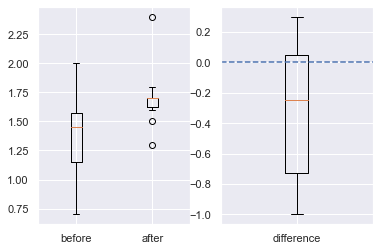

In [910]:
# Test parameters
alpha = 0.05
mean_0 = 0

# datasets
b = np.array([2,1.4,1.3,1.1,1.8,1.6,1.5,0.7,0.9,1.5])
a = np.array([1.7,1.7,1.8,1.3,1.7,1.5,1.6,1.7,1.7,2.4 ])
d = b-a

fig, axs = plt.subplots(1,2)

# Example the sample datasets
axs[0].boxplot([b,a])
axs[0].set_xticklabels(['before', 'after'])

# Examine the sample difference
axs[1].boxplot(d)
axs[1].set_xticklabels(['difference'])
axs[1].axhline(y=mean_0, linestyle='--')
plt.show()

In the boxplot above, the mean of sample differences is smaller than $0$, let's use hypothesis test to see if we can reject the null hypothesis and accept the alternative hypothesis as observed in this plot. 

Before the test, if we are not sure if the population data is normally distributed, we'd better examine if sample data follows normal distribution given the sample size is small. 

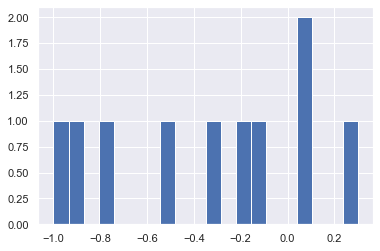

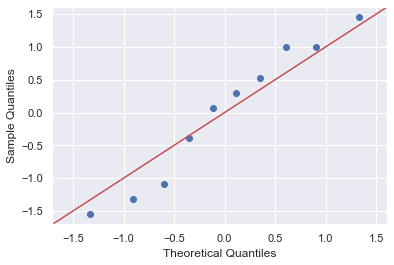

In [911]:
# Explore sample data using histogram
plt.hist(d, bins=20)

# Explore sample data using Normal Quantile-quantile plot
sm.qqplot(d, line='45', fit=True)
plt.show()

The sample data looks with certain normality and it's not found with strong skewness and outliers in the histogram, it is safe for us to use t test for inference. 

In [912]:
# Compute test statistics
mean_d = d.mean()
s_d = d.std(ddof=1) # use std for sample (divided by `n-1`)
n = len(d)
T = round((mean_d - mean_0)/(s_d/math.sqrt(n)),3)
T

-2.295

In [913]:
# Lookup critical t value for H_0 rejection
# since the null hypothesis has > sign, this is a left-tailed test 
t = round(stats.t.ppf(alpha, n-1),3)
t

-1.833

In [914]:
# Compute p-value for left-tailed test
p = round(stats.t.cdf(x=T, df=n-1),3)
p

0.024

**Conclusion**

We have evidence to reject the null hypothesis at $5\%$ signficance level  ($\alpha = 0.05$), because:

- $|T| > |t|$, also
- $p < 0.05$

If we are testing with $1\%$ signficance level ($\alpha = 0.01$), then, $p > 0.01$, that is, we will accept the null hypothesis that the drug is not contributing to the increase of magnetisum levels instead. Note that the probability of **Type I error** is reduced with smaller $\alpha$, this is for the test that requires stricter requirement for null hypothesis to be rejected. 


From this, we can conclude:

- Researcher should be very cautious, as the result could lead to type I error with higher significance level;
- The medincine shall entail more precise tests;
- Increasing sample size always leads to a better study, say collect data from 100 samples instead of from only 10.



# Test for Two Means, Independent Populations, Variance Known

## Example

It's argued that Engineering department exam is tougher than Management department exam in a school. It's expected Management will outperform Engineering in exam grades by $4\%$ on average. We'd like to verify if this is the case using the following hypothesis:

$$H_0: \mu_e - \mu_m \leq -4\%$$ where

- $\mu_e$ is the population mean of Engieering exam grades;
- $\mu_m$ is the population mean of Mangement exam grades.

against

$$H_a: \mu_e - \mu_m > -4\%$$

Suppose we know the population standard deviations of both departments as $\sigma_e = 10\%$ and $\sigma_m = 6\%$. 

We will use the latest exam grades from both departments to test the above hypothesis. In the latest exams, we have:

- 100 Engineering students' grades, which mean is $\bar{e} = 58\%$
- 70 Management students' grades, which mean is $\bar{m} = 65\%$

**Steps**

1. We will compute the test statistics $Z$ of the sample difference $\bar{e} - \bar{m}$. 

$$Z=\frac{\bar{d}-\mu_0}{\sqrt{\frac{\sigma_e^2}{n_e}+\frac{\sigma_m^2}{n_m}}}$$

2. And then compute the p-value, this is to find the probability that the difference between average engineering and management exam grades greater than the sample result given the null hypothesis is true. Therefore, this is a **right-tailed** test, we will use:

$$p = 1-CDF(Z)$$

3. If $p \leq \alpha$, we can reject the null hypothesis. 

In [915]:
# hypothesized population mean of difference
mu_0 = -0.04

# population standard deviations
sigma_e = .1
sigma_m = .06

# sample means
mean_e = .58
mean_m = .65

# sample sizes
n_e = 100
n_m = 70

# compute Z statistics of the sample
mean_d = mean_e - mean_m
Z = round((mean_d-mu_0)/math.sqrt(sigma_e**2/n_e + sigma_m**2/n_m),3)

# print results
print('sample difference: ', f'{mean_d*100:.2f}%')
print('test statistics (Z): ', Z)

sample difference:  -7.00%
test statistics (Z):  -2.438


In [916]:
# compute p-value for right tailed test
p = 1 - round(stats.norm.cdf(Z),3)

# print test result
alpha = .05
if p < alpha: 
    print(f'p-value = {p:.3f}, it is smaller than alpha ({alpha}), we have evidence to reject null hypothesis at {alpha*100:.2f}% signficance')
else:
    print(f'p-value = {p:.3f}, it is larger than alpha ({alpha}), we cannot reject the null hypothesis at {alpha*100:.2f}% signficance')

p-value = 0.993, it is larger than alpha (0.05), we cannot reject the null hypothesis at 5.00% signficance


Given the null hypothesis is true, the probability of observing the difference greater than the sample result is very high, in other words, the probability of observing the difference below the sample result $-0.07$ is very low, therefore, we cannot reject the null hypothesis.

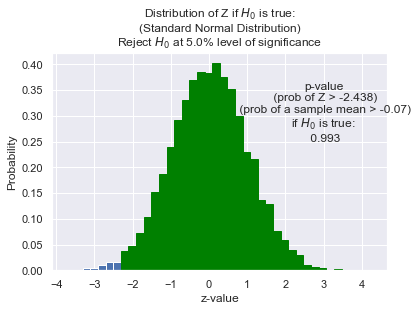

In [917]:
# visualize the distribution of test statistics given H_0 is true
value, bins, bars = plt.hist(np.random.standard_normal(size=10000), bins=40, 
                                 edgecolor='white', density=True)

# P-value (probability of observing value > Z)
for bar in bars:
    if bar.get_x() > Z:
        bar.set_color('green')

plt.text(s=f'p-value\n (prob of Z > {Z:.3f})\n (prob of a sample mean > {mean_d:.2f})\nif $H_0$ is true:\n {p}', x=3,y=.25,ha='center')

# Set titles and x,y labels
plt.title('Distribution of Z if $H_0$ is true:\n'+
          '(Standard Normal Distribution)\n' +
          f'Reject $H_0$ at {alpha*100:.1f}% level of significance')
plt.xlabel('z-value')
plt.ylabel('Probability')
plt.show()

# Test for Two Means, Independent, Unknown Equal Variances (Pooled Variance)


## Example

We are to compare the apple prices in New York and LA. We don't know the variance in both populations, but we assume that their variances are equal because they are both apple prices. 

We will formulate the hypothesis as follows:

- $H_0: \mu_{ny} - \mu_{la} = 0$, that is to assume the apple prices are not different in NY and LA;
- $H_a: \mu_{ny} - \mu_{la} > 0$, the alternative hypothesis is apples in NY are more expensive than in LA.

We have randomly collected the following sample prices:

In [918]:
ny_prices = np.array([3.8,3.76,3.87,3.99,4.02, 4.25,4.13, 3.98, 3.99, 3.62])
la_prices = np.array([3.02, 3.22, 3.24, 3.02, 3.06, 3.15, 3.81, 3.44])

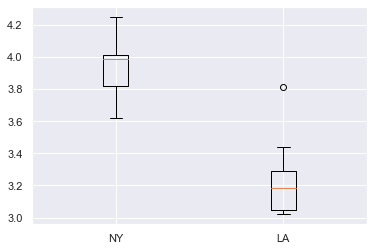

In [919]:
# Explore the datasets in boxplot
plt.boxplot([ny_prices, la_prices])
plt.xticks([1,2], ['NY', 'LA'])
plt.show()

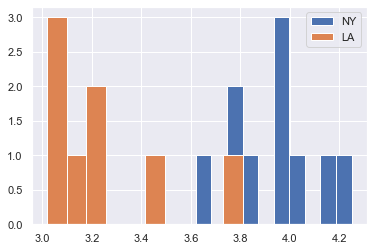

In [920]:
# Explore sample data normality using histogram
plt.hist(ny_prices, label='NY')
plt.hist(la_prices, label='LA')
plt.legend()
plt.show()

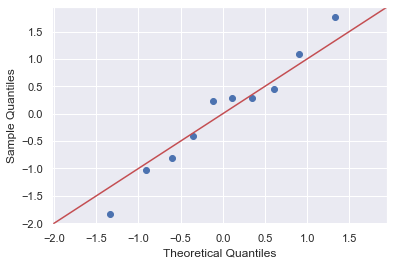

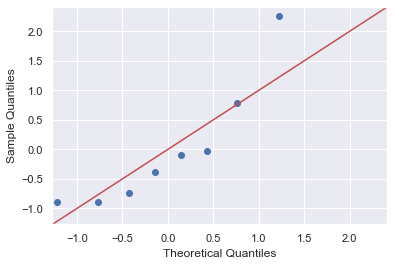

In [921]:
# Explore sample data normality using q-q plot
sm.qqplot(ny_prices, fit=True, line='45')
sm.qqplot(la_prices, fit=True, line='45')
plt.show()

From the boxplot above, it's observed the samples of LA have a mean much lower than that of NY samples. 

Also the histogram shows NY and LA apple prices don't share much overlap, there indicated a high chance of their prices are different largely.

Meanwhile, although we cannot verify normality of the sample datasets with q-q plots, we find that both samples in histogram follow normal distribution with small skewness and no outlines (actually, LA has only one outliner datapoint); therefore, we can assume it's safe to use t-test to make inference study.

**Steps to follow**

- Since this test involves two populations with unknown variance, by assuming their variances are equal, we will estimate the **pooled variance** by combining the variances computed from their random samples:

$$s_p^2 = \frac{(n_{ny}-1)s_{ny}^2+(n_{la}-1)s_{la}^2}{n_{ny}+n_{la}-2}$$


- Then, we compute the standard deviation from the **pooled variance** as follows:

$$se = \sqrt{\frac{s_p^2}{n_{ny}}+\frac{s_p^2}{n_{la}}}$$


- With the standard deviation of the sampling distribution, we can compute test statistic:

$$T = \frac{\bar{x}-\mu}{\sigma} = \frac{\bar{d}-\mu_0}{\sqrt{\frac{s_p^2}{n_{ny}}+\frac{s_p^2}{n_{la}}}}$$


- At last, we will compute P-value, the probability of observing a test statistics > the sample test statistics observed, therefore, this is a **right-tailed** test:

$$p = 1 - cdf(T)$$

In [922]:
# sample sizes
n_ny = len(ny_prices)
n_la = len(la_prices)
n_p = n_ny + n_la -2 #pooled sample size

# sample statistics
mean_ny = ny_prices.mean()
mean_la = la_prices.mean()
std_ny = ny_prices.std(ddof=1)
std_la = la_prices.std(ddof=1)

# compute pooled variance
var_p = ((n_ny-1)*(std_ny**2) + (n_la-1)*(std_la**2))/n_p

# compute se
se = math.sqrt(var_p/n_ny+var_p/n_la)

# compute T statistics
mu_0 = 0 # hypothesized difference, which is 0 for assumption of no difference
T = ((mean_ny - mean_la) - mu_0)/se

# compute P-value (right-tailed test)
p = 1-round(stats.t.cdf(T, df=n_p),3)

# print test statistics
print(f'sample difference: {(mean_ny - mean_la):.2f}')
print(f'pooled variance: {var_p:.2f}')
print(f'sample standard deviation (se): {se:.2f}')
print(f'sample sizes: ny({n_ny}), la({n_la}))')
print(f'T statistics: {T:.3f}')
print(f'p-value: {p:.3f}')

# print test result
alpha = 0.01

if p < alpha:
    print(f'p < {alpha}, we have evidence to reject the null hypothesis at {alpha*100}% signficance')
else:
    print(f'p >= {alpha}, the data cannot reject the null hypothesis at {alpha*100}% signficance')

sample difference: 0.70
pooled variance: 0.05
sample standard deviation (se): 0.11
sample sizes: ny(10), la(8))
T statistics: 6.534
p-value: 0.000
p < 0.01, we have evidence to reject the null hypothesis at 1.0% signficance


Actually, we can observe from the test statistics being $T = 6.534$, that the distance from sample result to the hypothesized mean in $\sigma$ is extremly large; even without testing, we'd know that the probability of observing a result more extreme than this sample result is very low. 

Of course, we have p-value computed, which corresponds to the above observation and equals to $0.000$. We have strong evidence to reject the null hypothesis and accept the alternative hypothesis that "**Apples in NY are more expensive than in LA**".